# Strain rates comparison Tutorial

In this tutorial we will walk through how to understand various methods for calculating strain rate and how they are similar and different. 
Strain rate is related to the spatial derivatives of velocity, just as strain is related to the spatial derivatives of displacements: 
$$ \epsilon_{ij} = \frac{1}{2} \left(\frac{\partial \dot{v}_y}{\partial x} + \frac{\partial \dot{v}_x}{\partial y} $$

In this tutorial we will compare strain rates for several methods and calculate various statistics of interest. 

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

def plotCov(h, *args):
    for arg in args:
        plt.plot(h, arg)
    plt.xlabel('Distance')
    plt.ylabel('Covariance')

The methods in Strain_2D used to calculate strain rate mostly involve some type of interpolation. 
Interpolation introduces uncertainty, since the surface velocities are not known everywhere. 
Different methods have different approaches to handle this uncertainty; however, each method has to define a way to handle the three fundamental characteristics of an interpolation scheme: 
1. The degree of fit to the data (except for certain approaches which use the data exactly as is; this is not ideal as the data have errors that get propagated through to the strain rate). 
2. The degree of smoothness; or the behavior of the interpolated field at very short length scales. E.g. a surface can be continuous but not differentiable, or it could be both continuous and differentiable. 
3. The spatial correlation length scale - a distance scale the describes the characteristic length over which measurements are correlated. The assumption is that once you get far enough away from a point, the data no longer helps you to interpolate the value at that point. 

These three fundamental properties of any interpolation scheme can be visualized using correlation plots as shown below

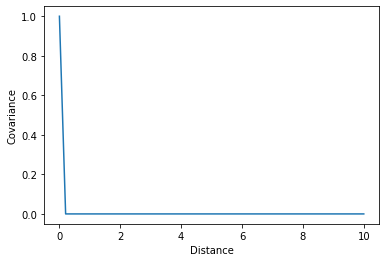

In [7]:
# distance
h = np.linspace(0,10)

# various covariance functions

# A white noise or "nugget" model. Points are always perfectly correlated to themselves, otherwise the correlation is zero
# The nugget is the variance of the white-noise process
def whiteNoise(h, nugget):
    out = np.zeros(h.shape)
    out[h==0] = nugget
    return out

plotCov(h, whiteNoise(h, 1))

In the next section, note the difference between the distance correlation reaches zero in the two models. 
The correlation length is not equal to the distance at which the correlation goes to zero, only proportional to that distance. 

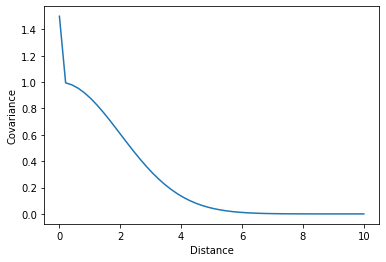

In [26]:
# A Gaussian model, described by a variance scale (sill), correlation length (range), and the data noise (nugget)
def Gaussian(h, sill, range, nugget=None):
    out = sill * np.exp(-.5 * np.square(h / range))
    return [out + nugget * (h==0) if nugget is not None else out][0]

plotCov(h, Gaussian(h, 1, 2, 0.5)) # here a range of 2

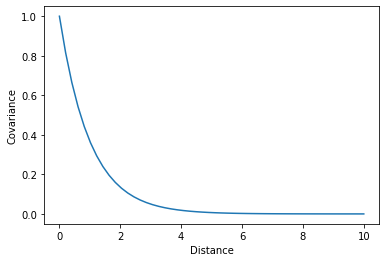

In [29]:
# An Exponential model, with the same parameters as a Gaussian but a different behavior at short distances
def Exponential(h, sill, range, nugget=None):
    out = sill * np.exp(-.5 * (h / range))
    return [out + nugget * (h==0) if nugget is not None else out][0]

plotCov(h, Exponential(h, 1, 0.5, 0)) # here a range of 0.5

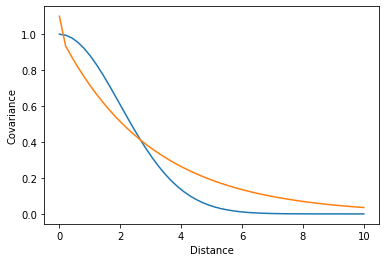

In [38]:
# We can compare multiple models 
# Note that even when the effective length scales are similar, the behavior is different due to the different models
plotCov(
    h, 
    Gaussian(h, 1, 2), 
    Exponential(h, 1, 1.5, 0.1),
)